In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
import os

In [ ]:
import glob

In [ ]:
from IPython.display import Image,display

In [ ]:
HOME=os.getcwd()

In [ ]:
print(HOME)

/content


In [ ]:
!mkdir {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [ ]:
%cd {HOME}/datasets

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CPZVSxx9eJq0fP1gJ0Dm")
project = rf.workspace("alabama-transport-insititue-tbwq8").project("ati-yolov8")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.24, to fix: `pip install ultralytics==8.0.196`


TRAINING THE MODEL

In [ ]:
%cd {dataset.location}


/content/datasets/ATI-yoloV8-1


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/ATI-yoloV8-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

In [ ]:
!ls {HOME}/runs/detect/train2


args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1709962714.44c9b8dac06f.2779.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch14490.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch14491.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch14492.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


### **Displaying confusion matrix**

In [ ]:
from IPython.display import Image


/content


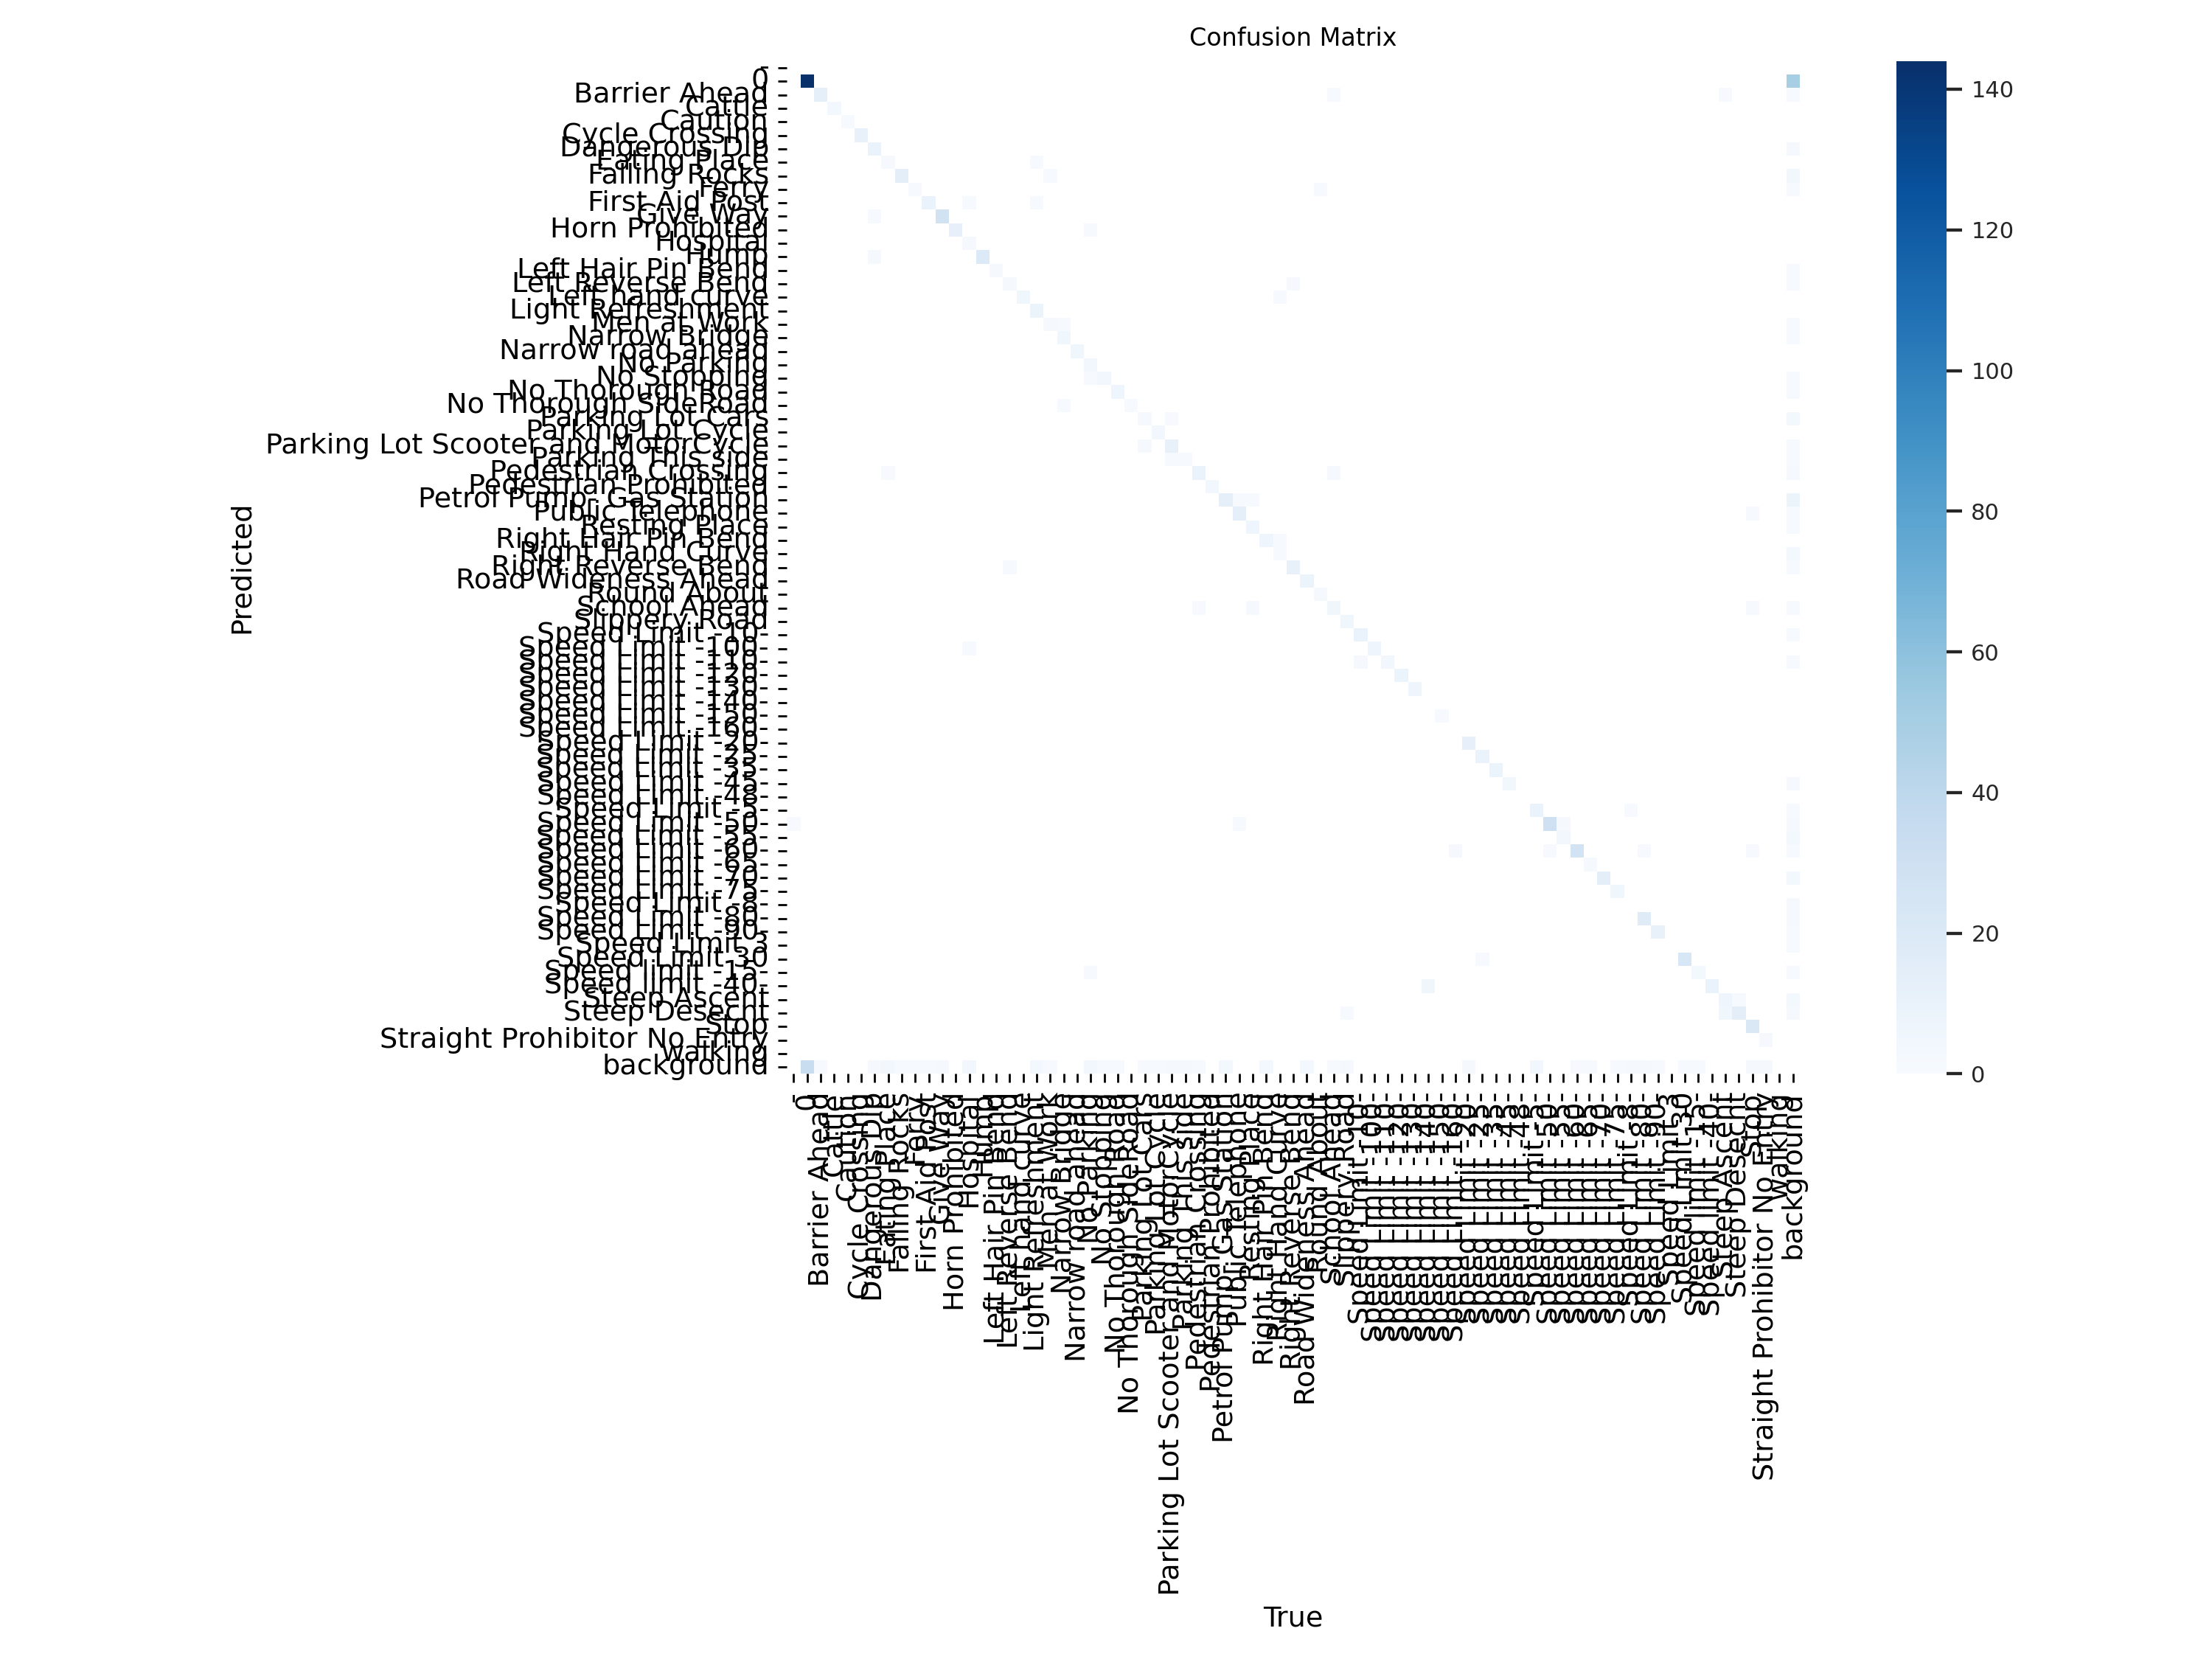

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=900)

### **Training and Validation Loss**

/content


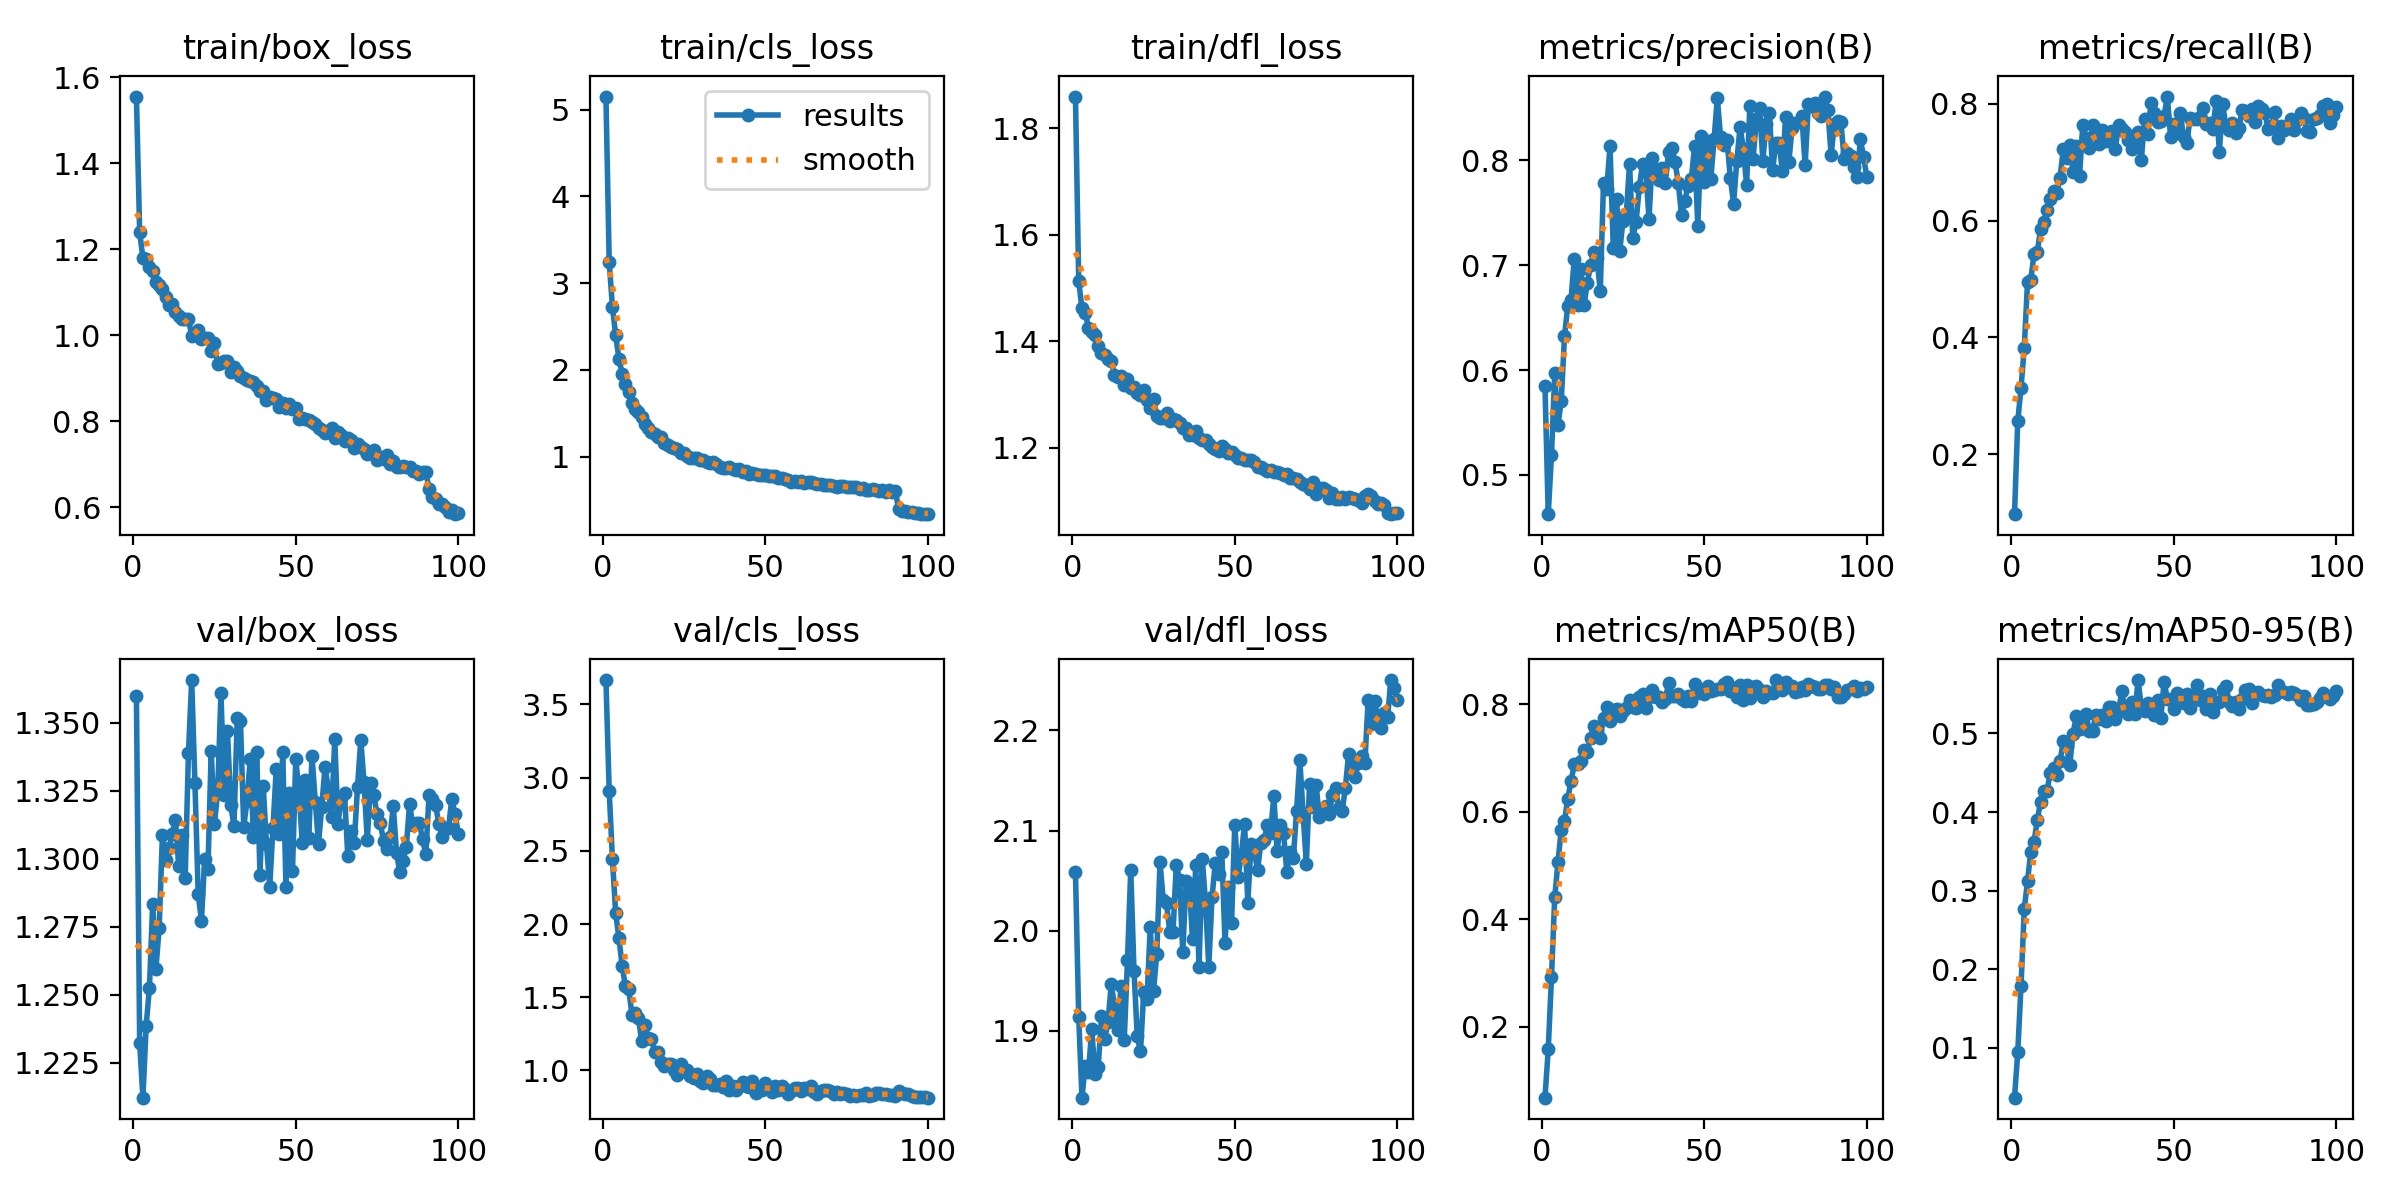

In [ ]:
%cd {HOME}

Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

# **Predicton**

/content


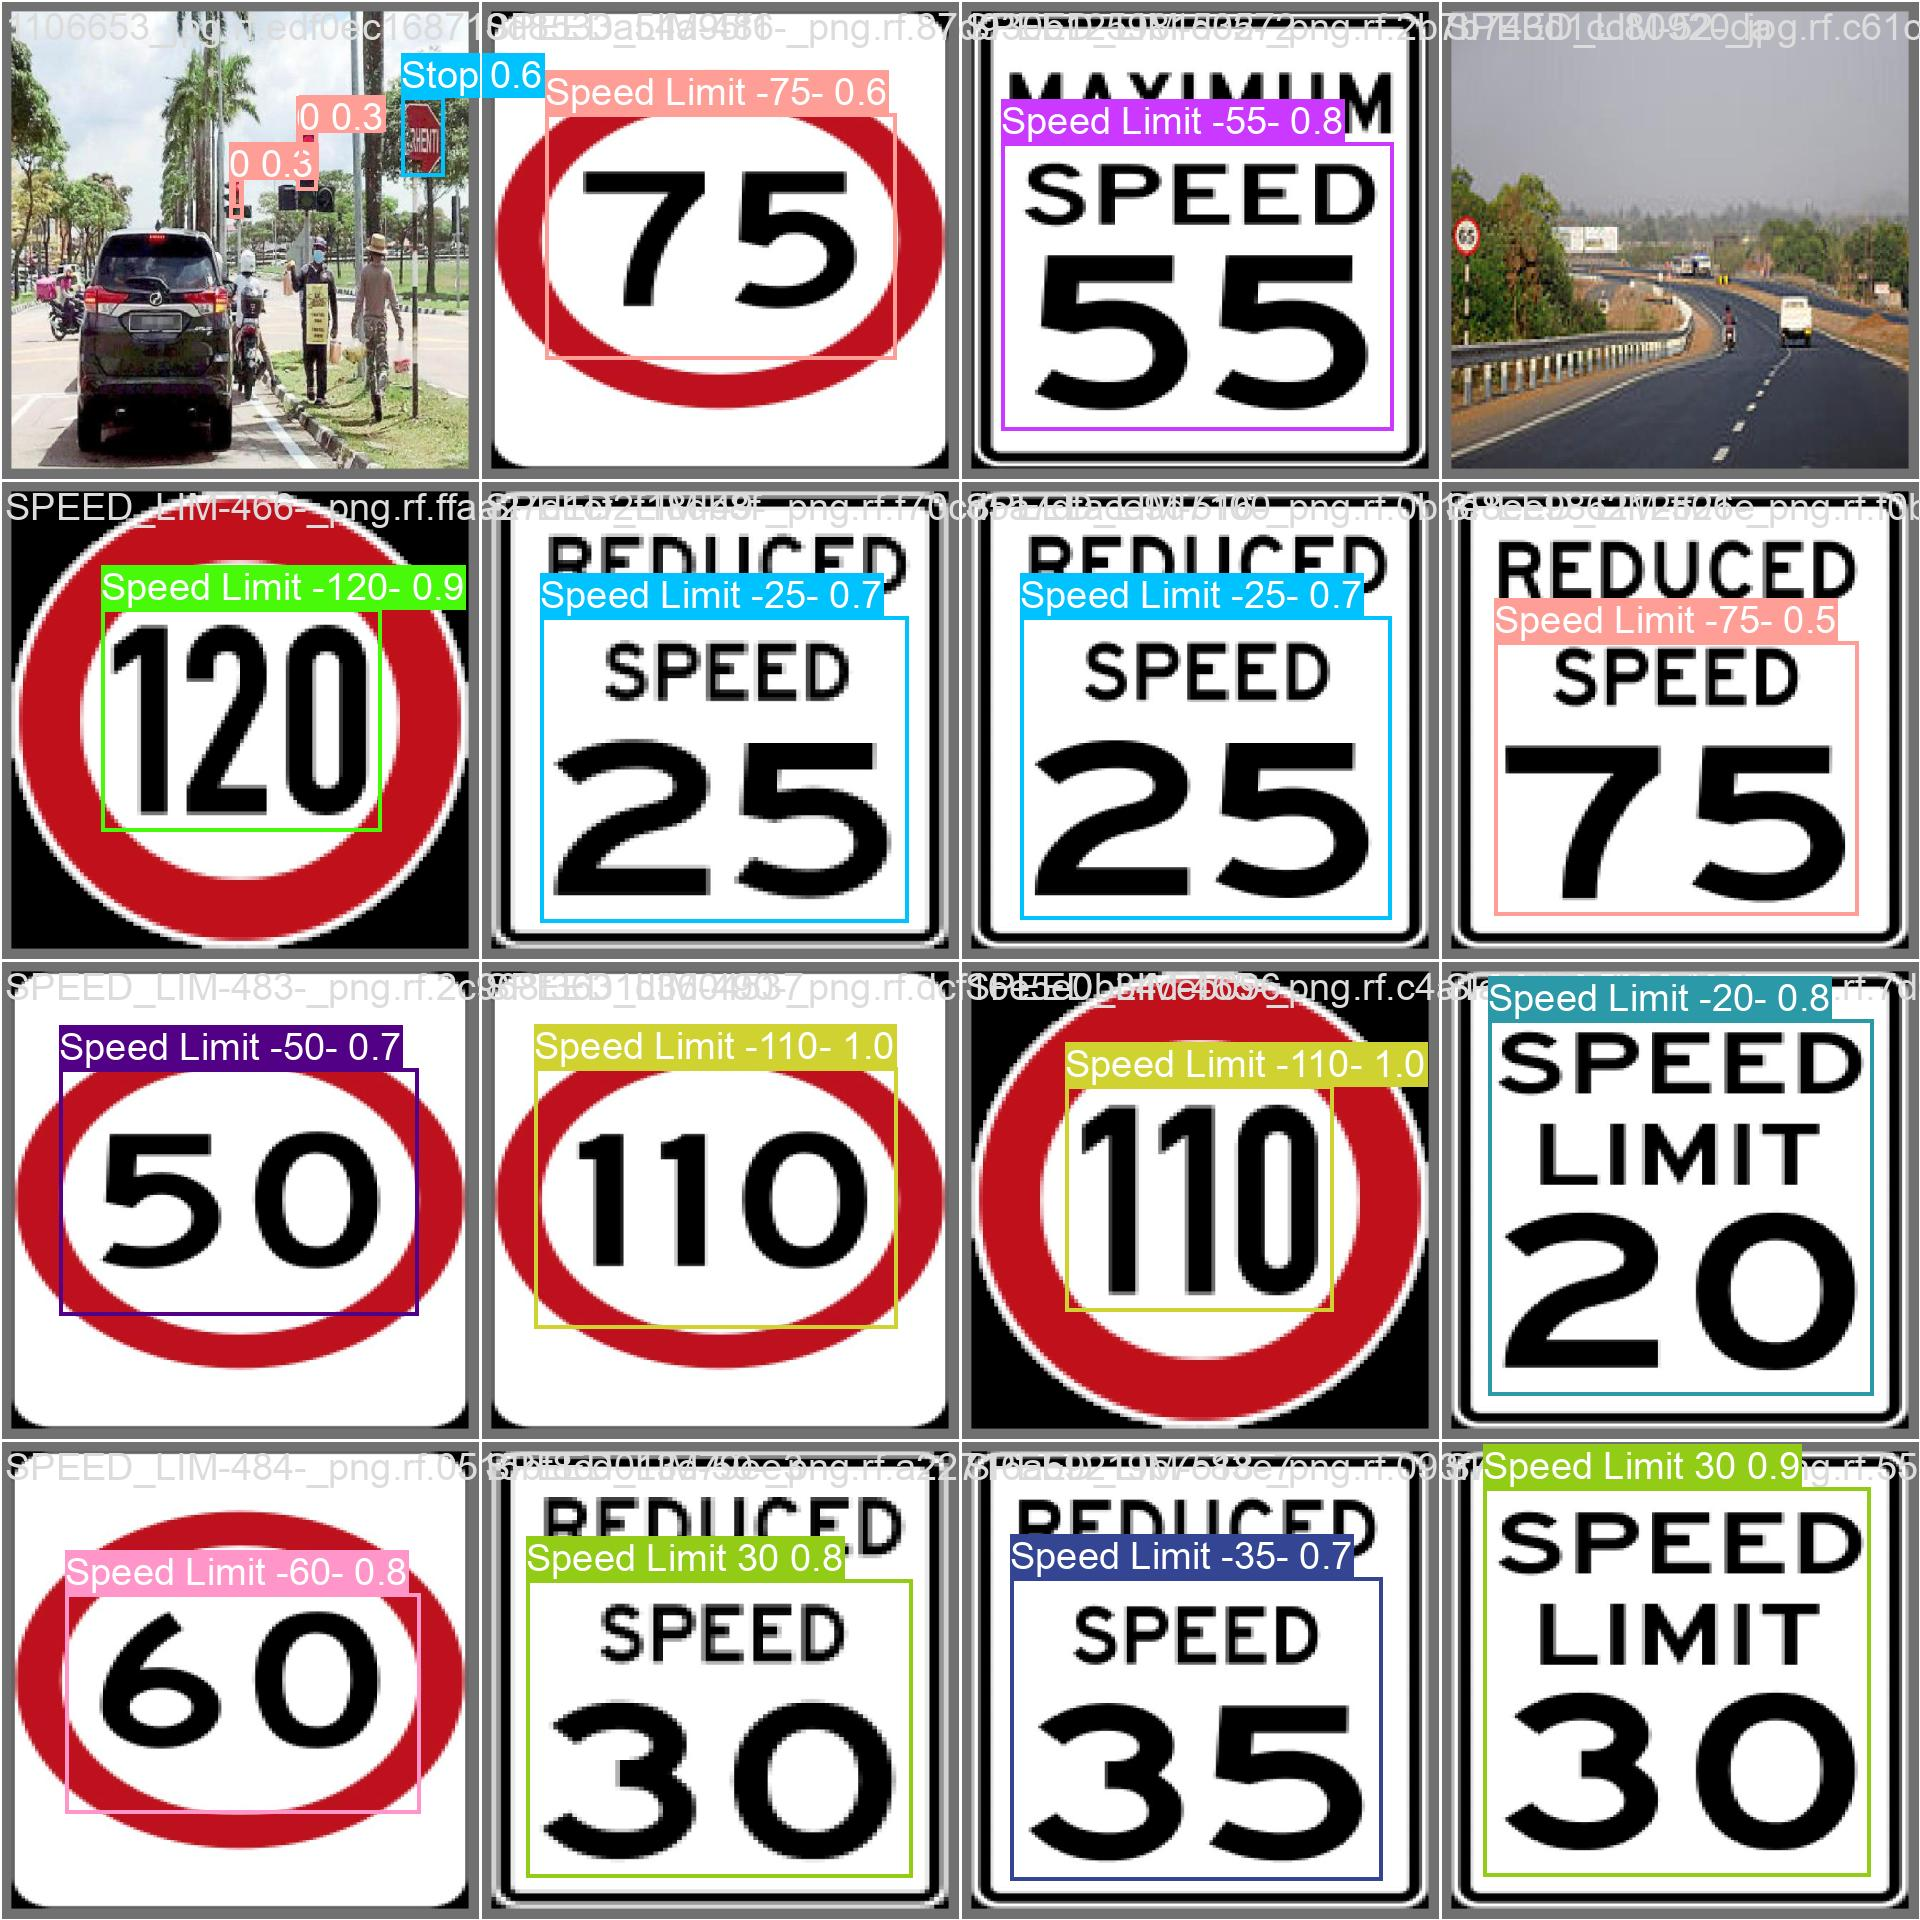

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model='{HOME}/runs/detect/train2/weights/best.pt' data={dataset.location}/data.yaml


/content
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11154222 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/datasets/ATI-yoloV8-1/valid/labels.cache... 770 images, 3 backgrounds, 0 corrupt: 100% 770/770 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 49/49 [00:16<00:00,  3.02it/s]
                   all        770        866      0.807      0.751      0.839      0.568
                     -        770          1          0          0          0          0
                     0        770        178      0.797      0.725      0.809      0.434
         Barrier Ahead        770         15      0.804      0.933      0.982      0.877
                Cattle        770          3      0.846          1      0.995      0.807
               Caution        770          1      0.759          1      0.995      0.697
        Cycle Crossing      

# **Inference with Custom Model**

  Where   
  TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
               
   MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                
  ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    
                See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco128.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolov8n-cls.pt format=onnx imgsz=224,128

    6. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer

    5. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings

In [ ]:
%cd {HOME}

!yolo task=classify mode=predict model='{HOME}/runs/detect/train2/weights/best.pt' source='/content/datasets/ATI-yoloV8-1/test/images'


/content
WARNING ⚠️ conflicting 'task=classify' passed with 'task=detect' model. Ignoring 'task=classify' and updating to 'task=detect' to match model.
Ultralytics YOLOv8.1.24 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11154222 parameters, 0 gradients, 28.6 GFLOPs

image 1/813 /content/datasets/ATI-yoloV8-1/test/images/BA-10-_jpg.rf.888bfb7aee73f41641cd6f2e6889831e.jpg: 640x640 1 Barrier Ahead, 23.8ms
image 2/813 /content/datasets/ATI-yoloV8-1/test/images/BA-11-_png.rf.899f8b7d12300ea1ff14cf0391ef1a09.jpg: 640x640 1 Barrier Ahead, 16.7ms
image 3/813 /content/datasets/ATI-yoloV8-1/test/images/BA-12-_jpg.rf.b55d4274678d548429939f398c353ff6.jpg: 640x640 1 Barrier Ahead, 16.7ms
image 4/813 /content/datasets/ATI-yoloV8-1/test/images/BA-13-_png.rf.640665dbf71d5c63d3fe47d38c77fbdf.jpg: 640x640 1 Barrier Ahead, 16.7ms
image 5/813 /content/datasets/ATI-yoloV8-1/test/images/BA-16-_png.rf.f6a69ccc0719631fcd88722fa141d39b.jpg: 640x640 1 Barrie

In [ ]:
from shutil import make_archive
from google.colab import files

# Replace 'folder_name' with the actual name of the folder you want to download
folder_to_download = 'folder_name'

# Create a zipped archive of the folder
make_archive(folder_to_download, 'zip', folder_to_download)

# Download the zipped archive
files.download(f'{folder_to_download}.zip')


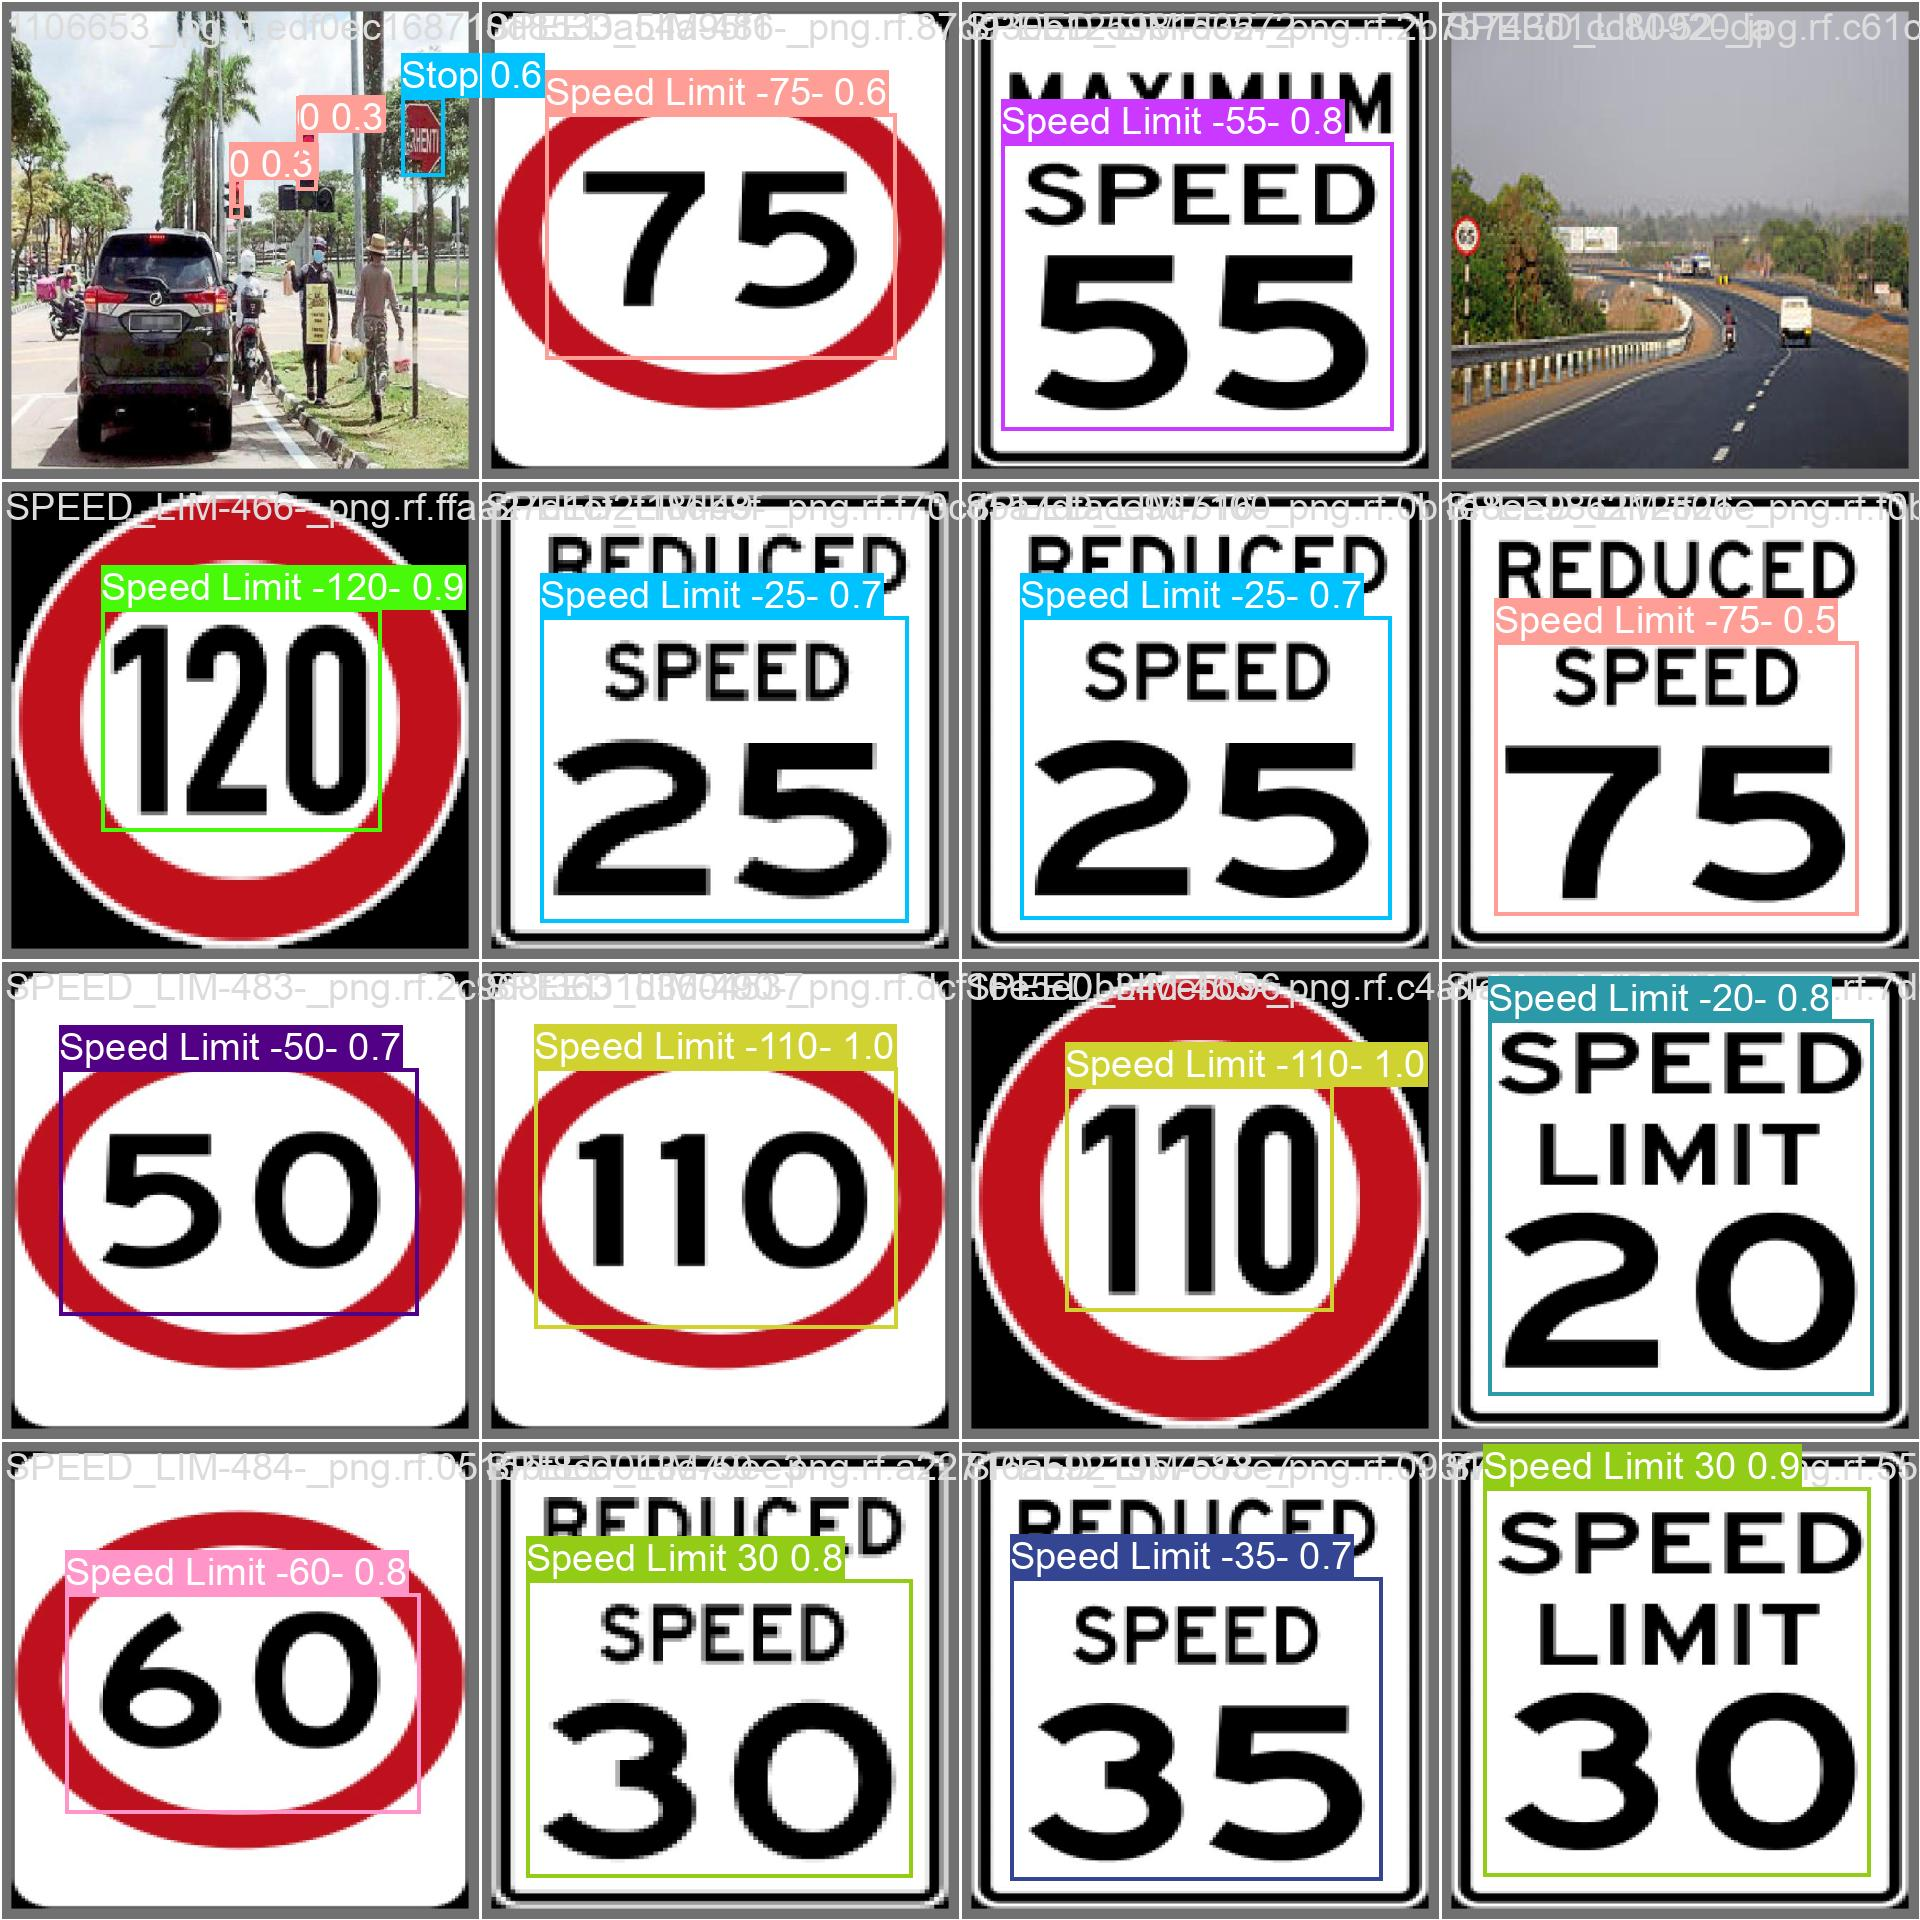

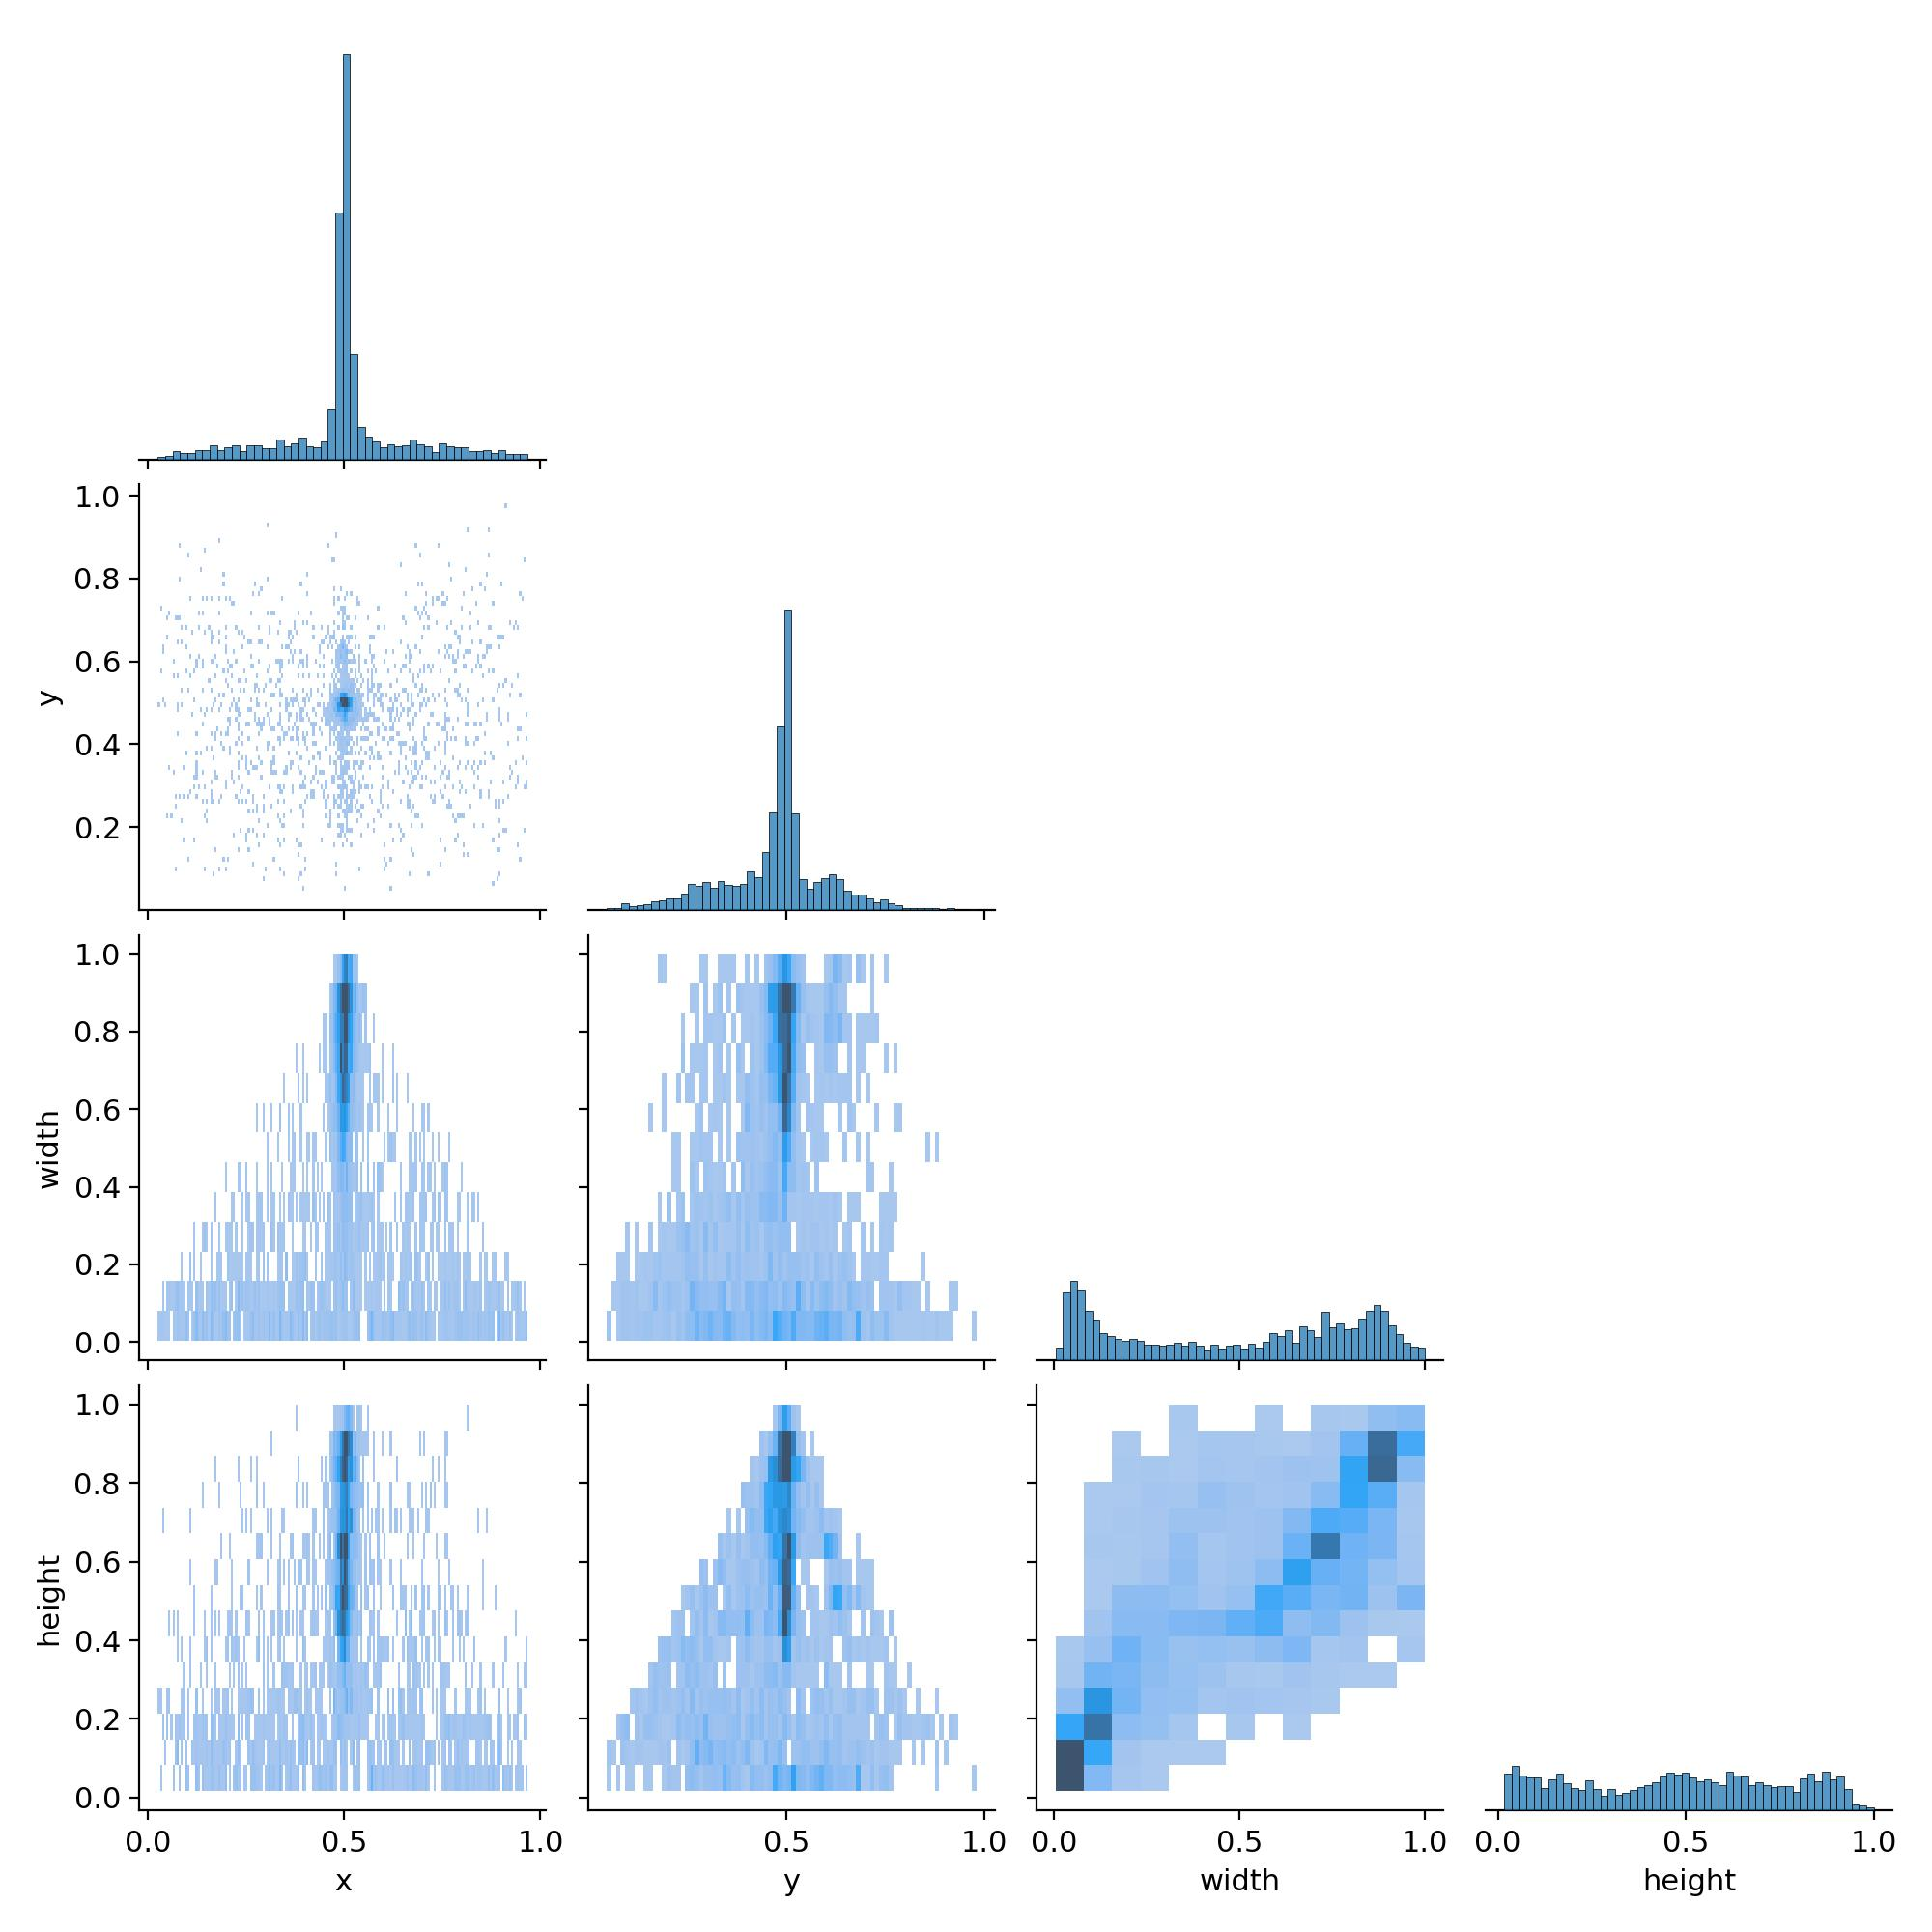

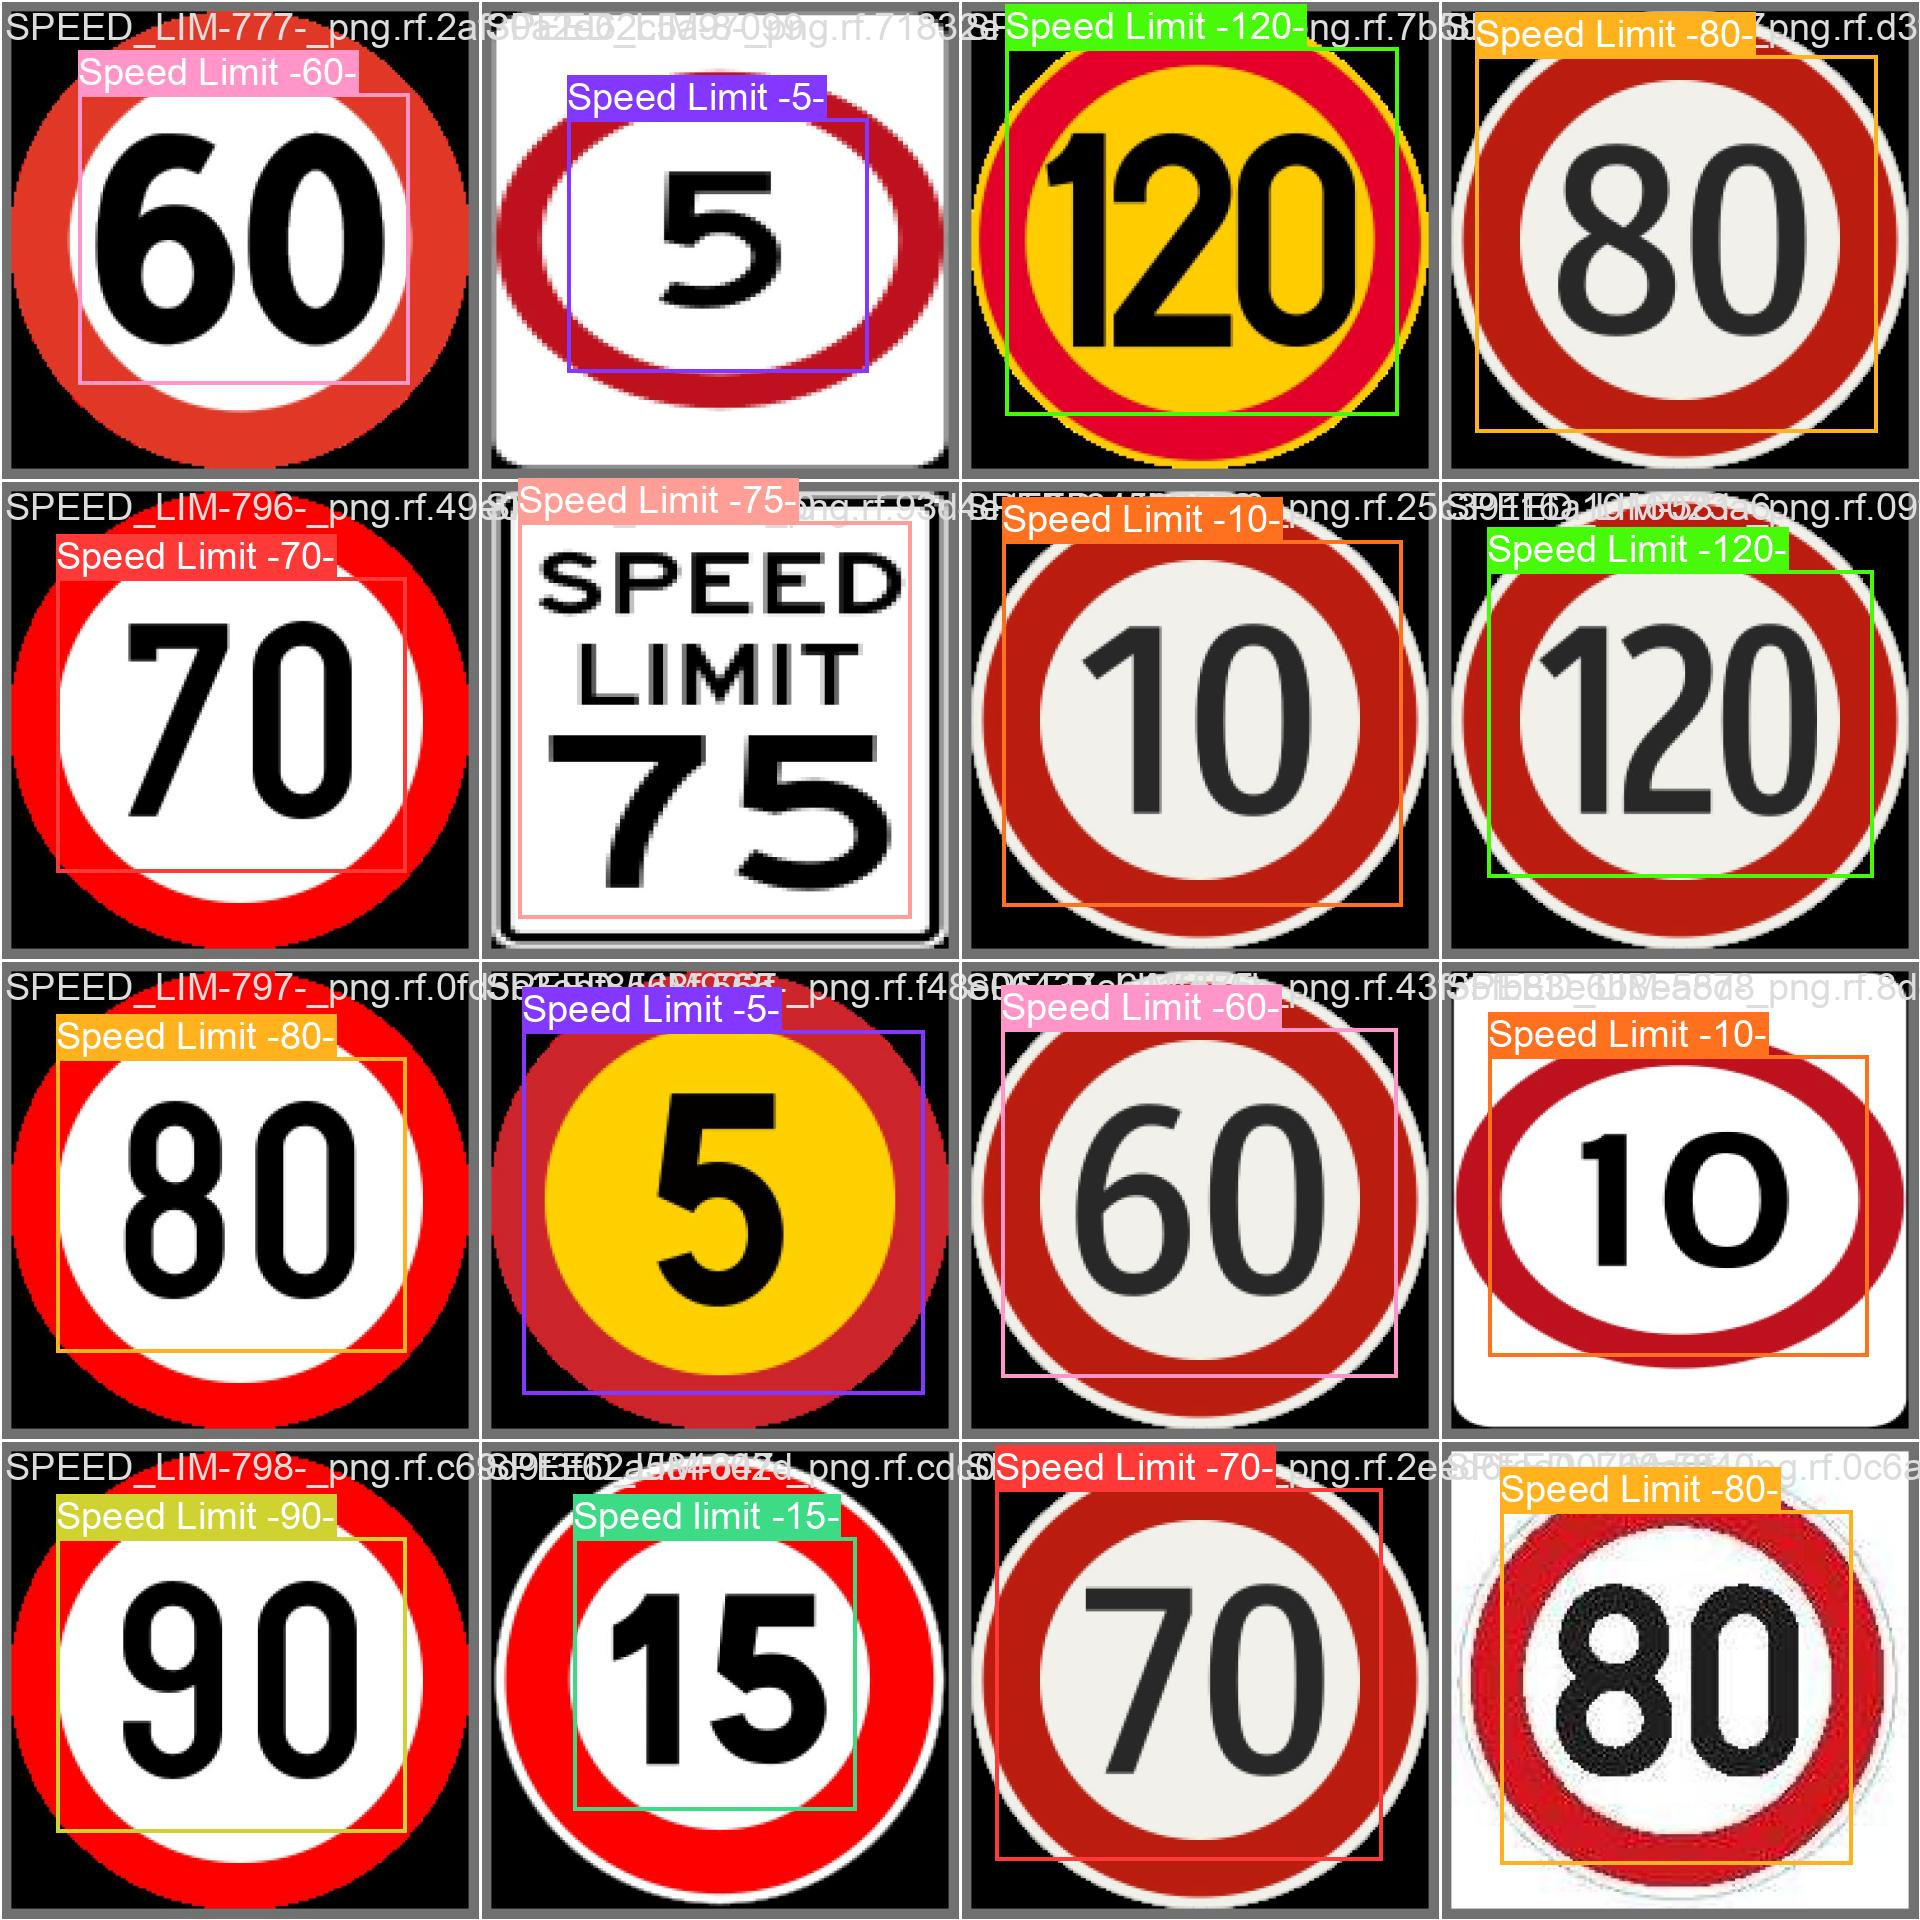

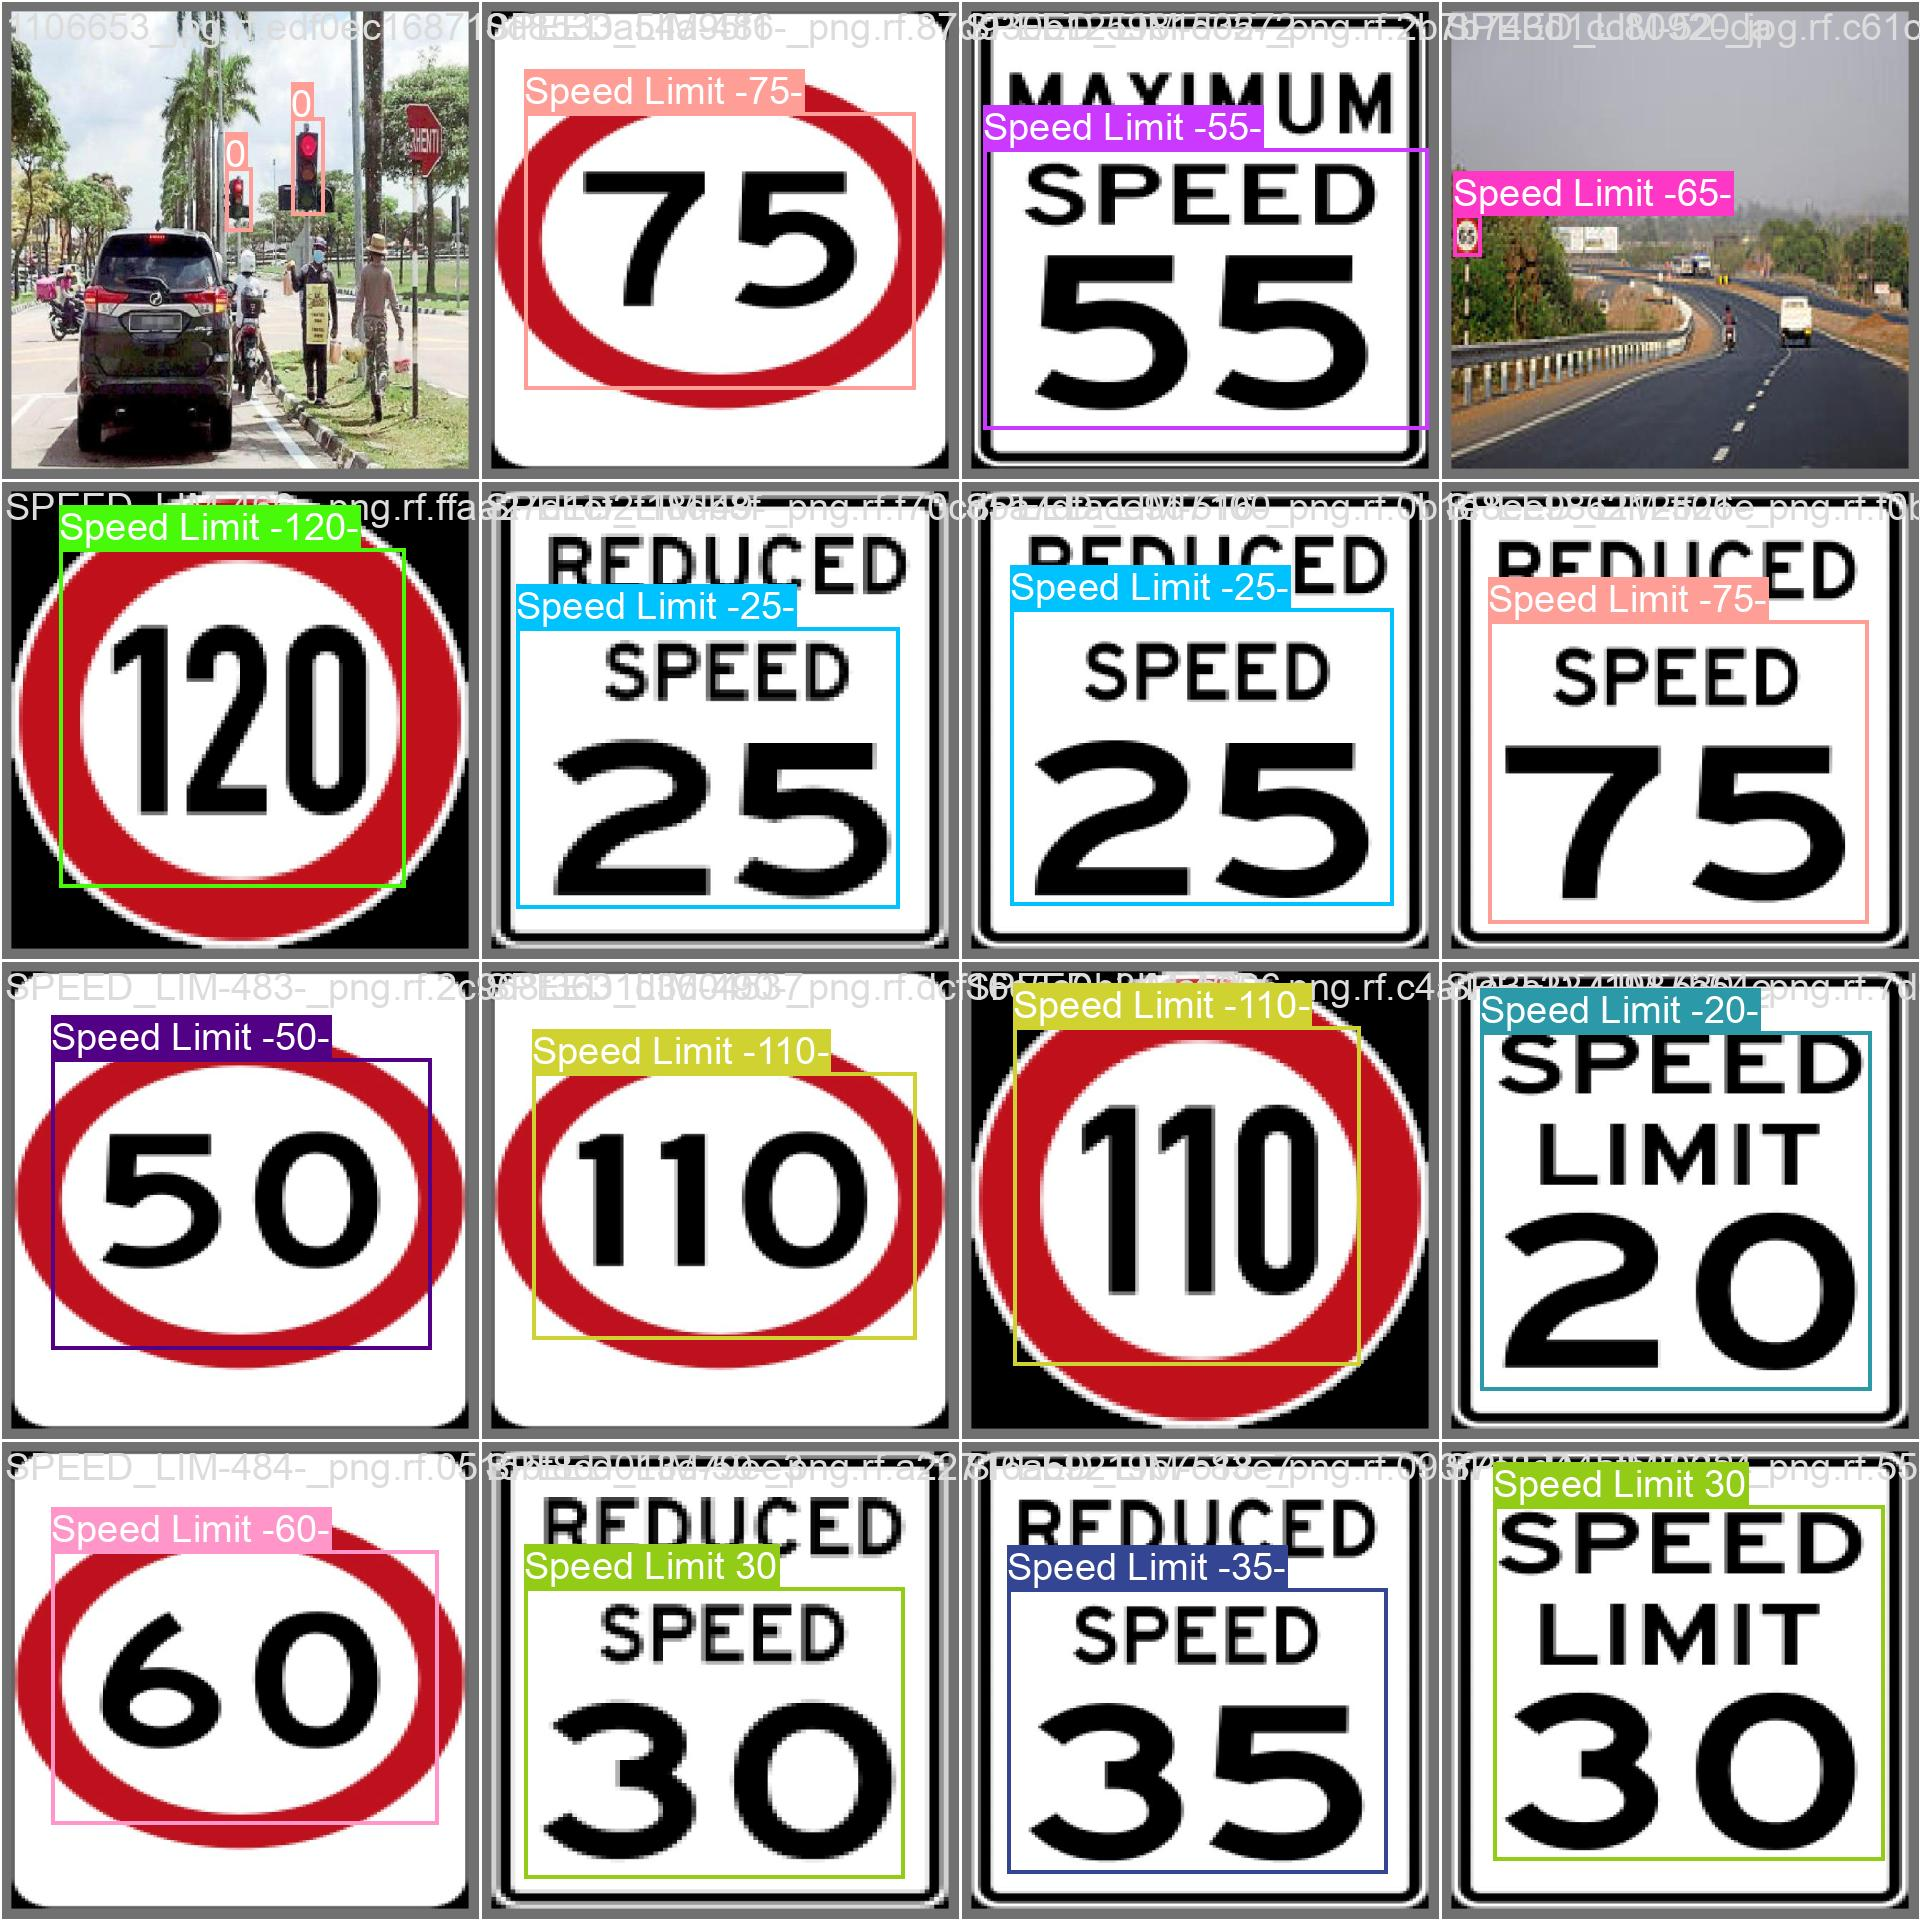

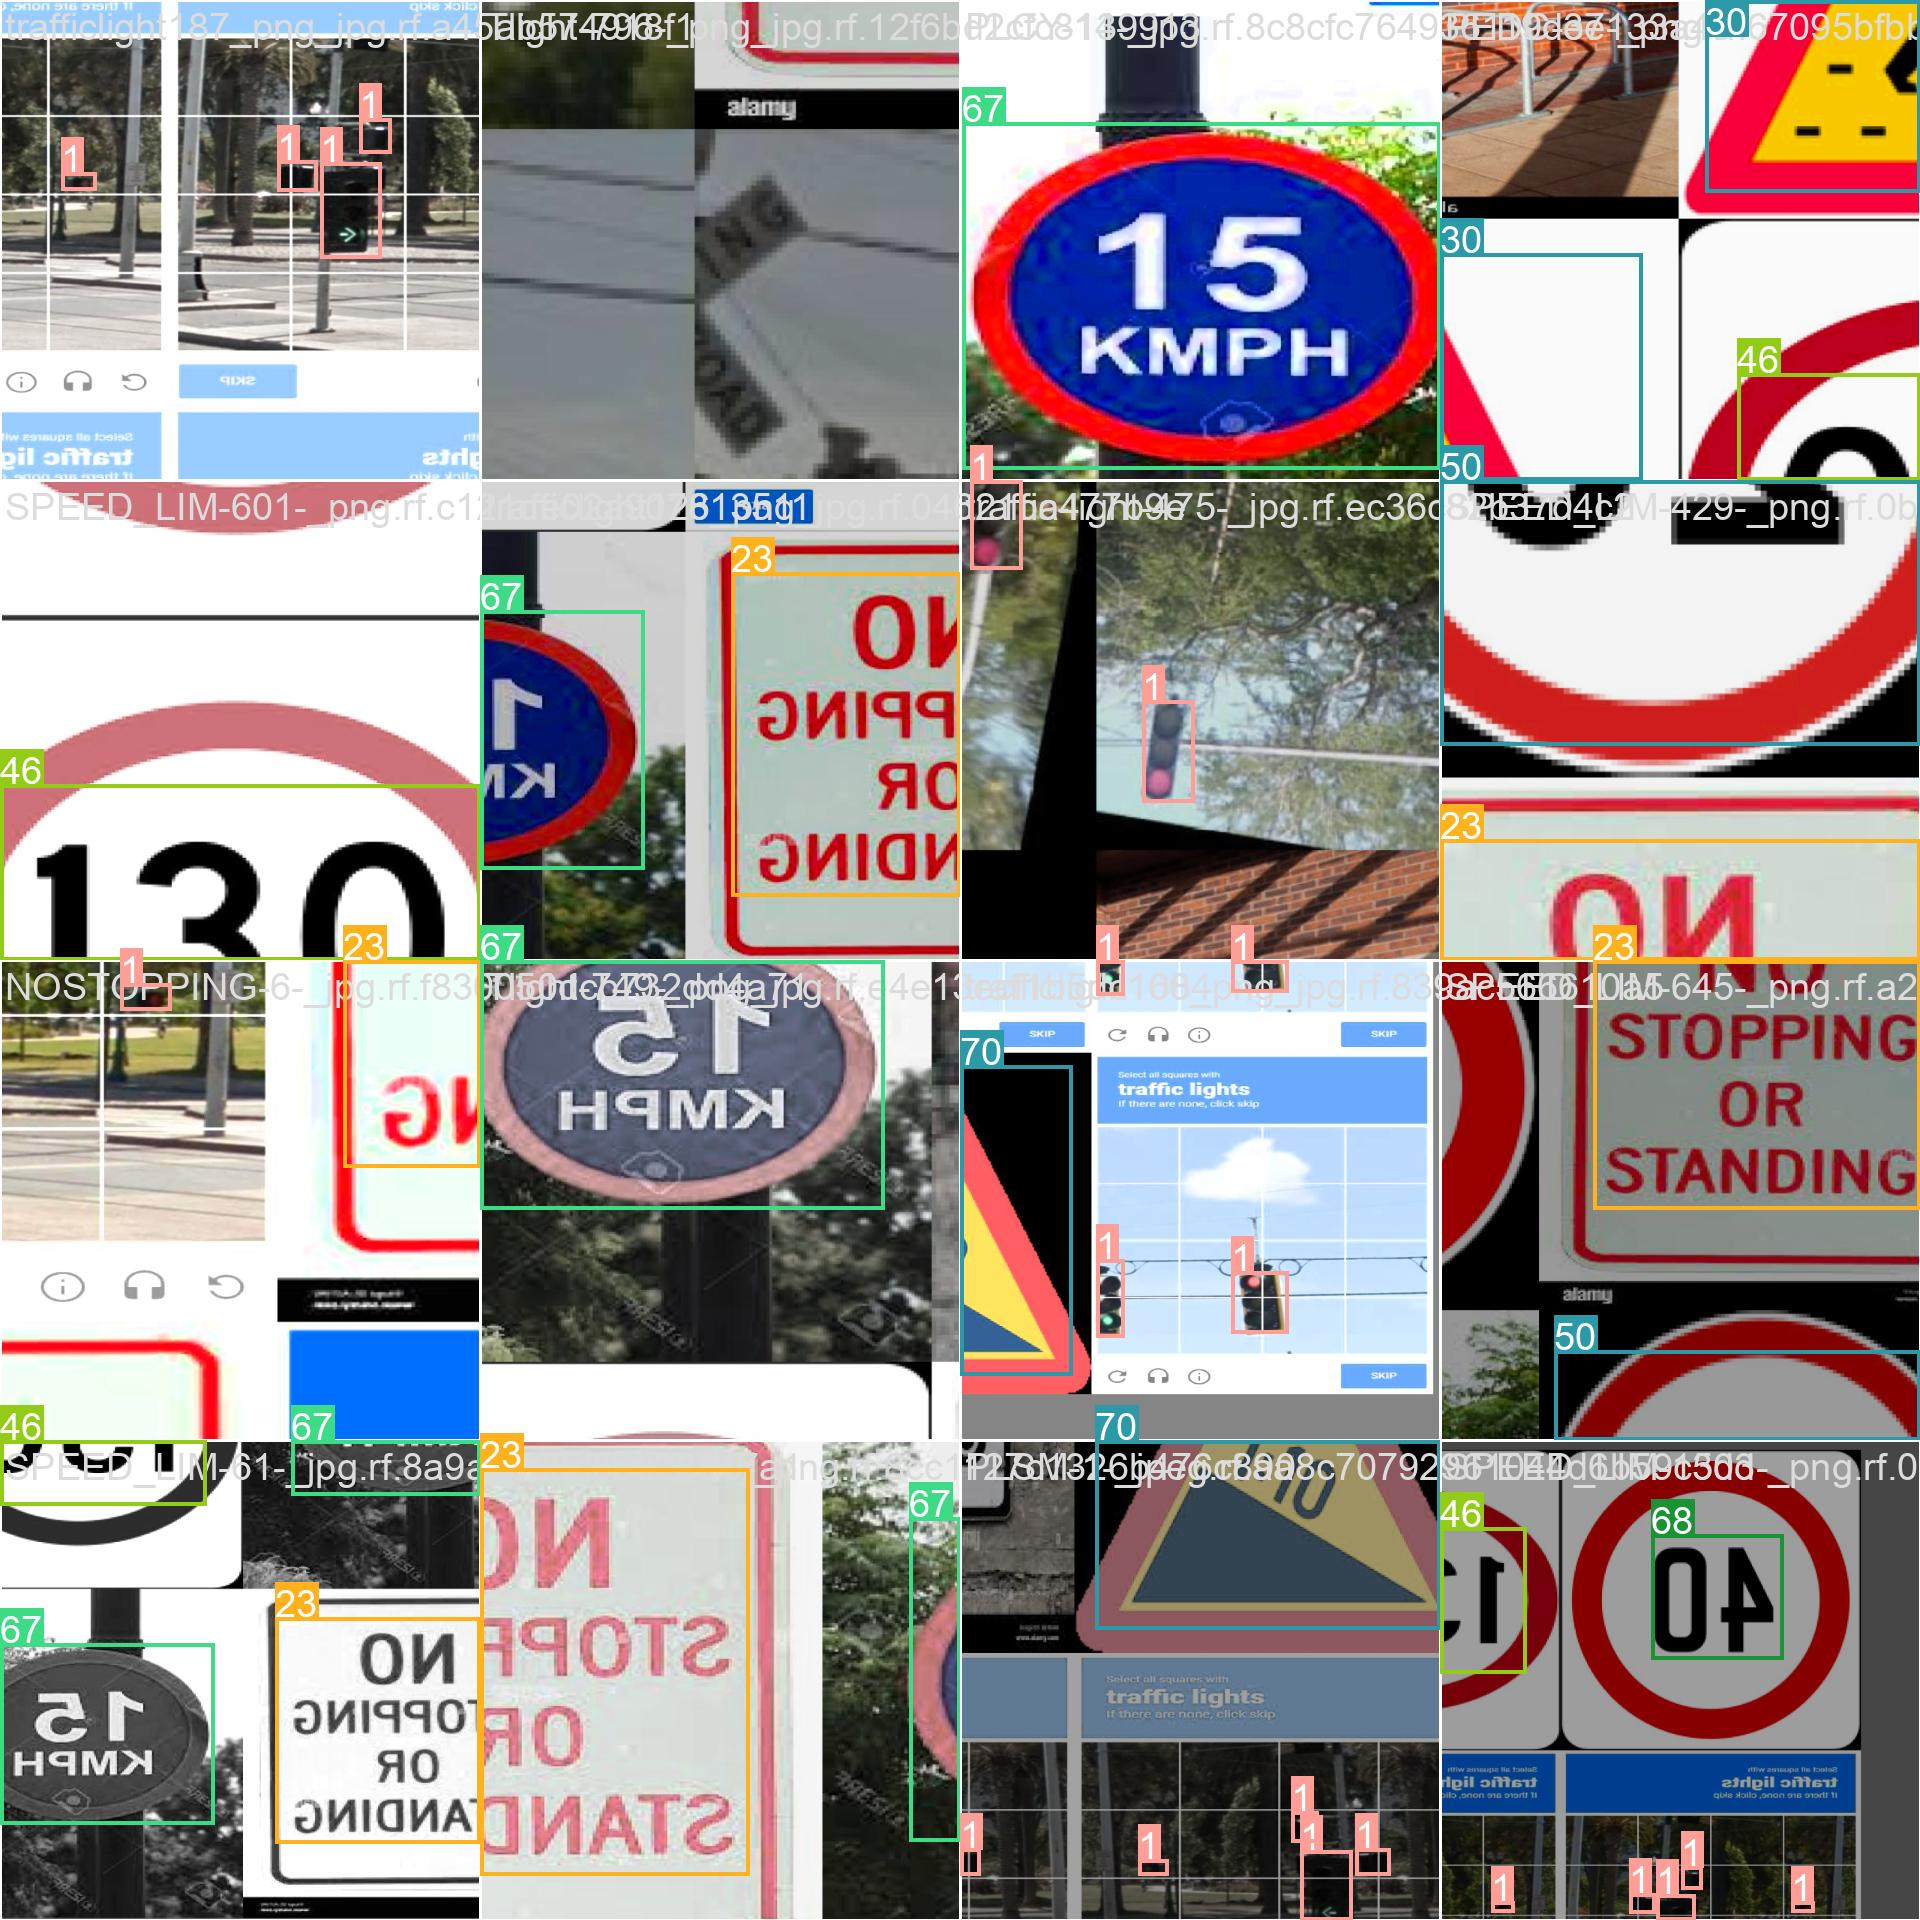

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train2/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

# **Testing on a Demo Video**

In [ ]:
%cd {HOME}

!python predict.py model='{HOME}/runs/detect/train2/weights/best.pt' source='/content/ultralytics/ultralytics/yolo/v8/detect/cinTA_v2-1/test/images'
